In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
data = pd.read_csv('student_data.csv')

In [6]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [11]:
data.isnull().values.any()

False

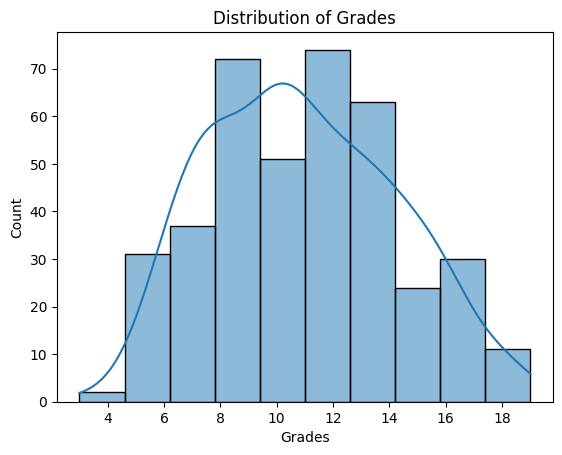

In [15]:
# Visualize distributions
sns.histplot(data['G1'], bins=10, kde=True)
plt.xlabel('Grades')
plt.title('Distribution of Grades')
plt.show()

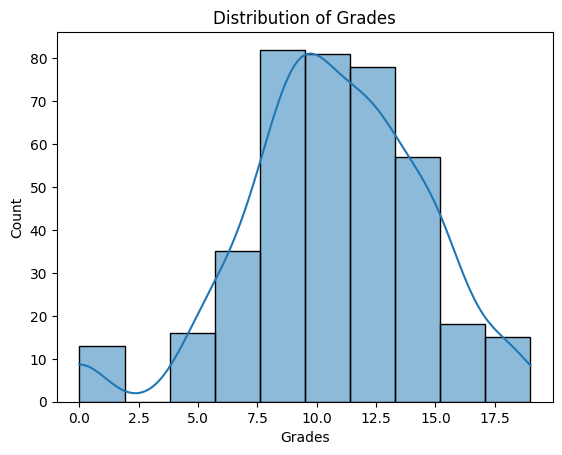

In [16]:
# Visualize distributions
sns.histplot(data['G2'], bins=10, kde=True)
plt.xlabel('Grades')
plt.title('Distribution of Grades')
plt.show()

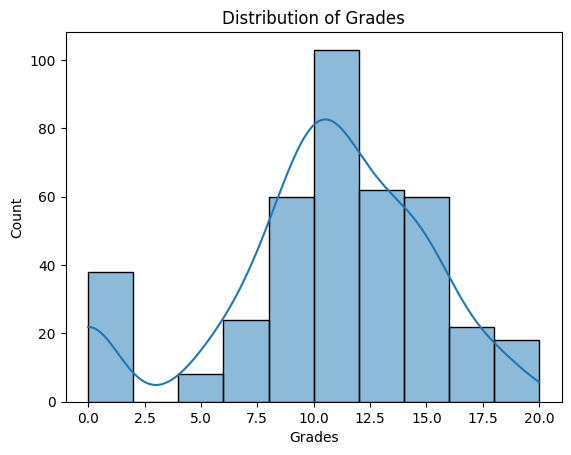

In [17]:
# Visualize distributions
sns.histplot(data['G3'], bins=10, kde=True)
plt.xlabel('Grades')
plt.title('Distribution of Grades')
plt.show()

In [103]:
data['avg'] = data[['G1', 'G2', 'G3']].mean(axis=1)

In [104]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


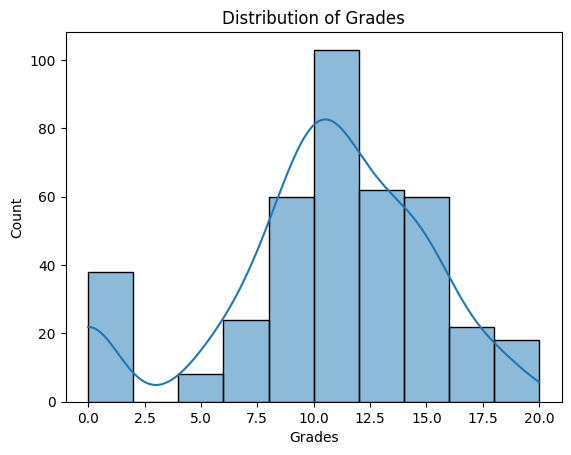

In [105]:
# Visualize distributions
sns.histplot(data['G3'], bins=10, kde=True)
plt.xlabel('Grades')
plt.title('Distribution of Grades')
plt.show()

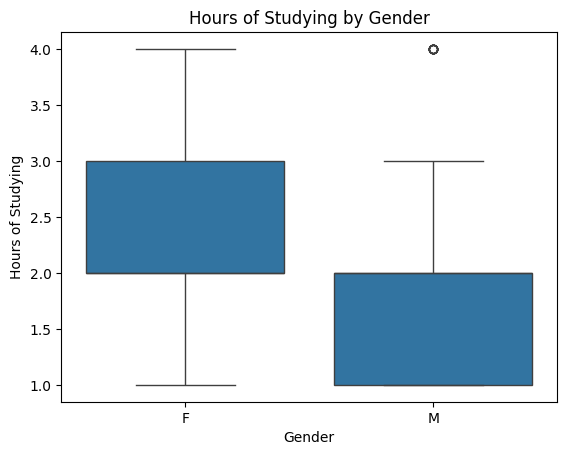

In [18]:
sns.boxplot(x='sex', y='studytime', data=data)
plt.xlabel('Gender')
plt.ylabel('Hours of Studying')
plt.title('Hours of Studying by Gender')
plt.show()

In [106]:
corrdata = data[['traveltime', 'studytime', 'failures', 'health', 'absences', 'avg', 'freetime']]

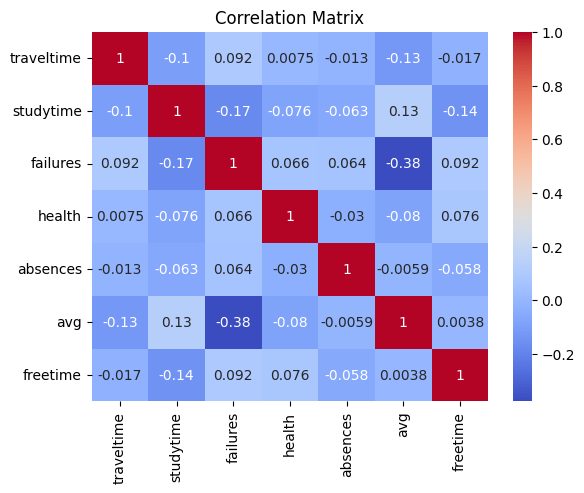

In [107]:
# Correlation analysis
correlation_matrix = corrdata.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [130]:
# Machine learning - Predicting grades based on hours of studying
X = data[['studytime']]  # Independent variable
y = data[['avg']]  # Dependent variable

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [133]:
# Predicting on test data
predictions = model.predict(X_test)

In [134]:
# Model evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 14.813257447455413


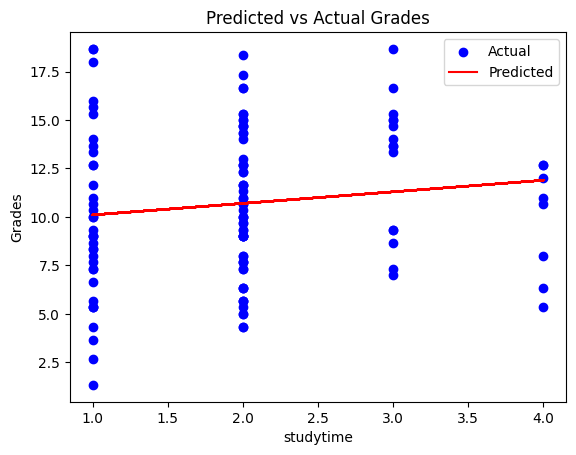

In [135]:
# Visualizing predicted vs actual grades
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.xlabel('studytime')
plt.ylabel('Grades')
plt.legend()
plt.title('Predicted vs Actual Grades')
plt.show()